Cette première session de NLP va vous donner les bases de la manipulation de texte en vue du data challenge qui vous attend après l'été !

In [ ]:
!pip install spacy
!python -m spacy download fr_core_news_md

In [5]:
import spacy

# Preprocessing avec spacy

## Chargement de la librairie

- Importer la classe `French` de `spacy.lang.fr`
- Créer l'objet `nlp` avec le constructeur de la classe `French`
- Créer un `doc` et afficher son texte.

In [ ]:
# Importez la classe de langage French
from spacy.lang.____ import ____

# Créez l'objet nlp
nlp = ____

# Traitement du texte
doc = nlp("Ceci est une phrase narcissique puisqu'elle "
          "ne parle que d'elle-même.")

# Affichez le texte du document
print(____.text)

In [2]:
# Importez la classe de langage French
from spacy.lang.fr import French

# Créez l'objet nlp
nlp = French()

# Traitement du texte
doc = nlp("Ceci est une phrase narcissique puisqu'elle "
          "ne parle que d'elle-même.")

# Affichez le texte du document
print(doc.text)

Ceci est une phrase narcissique puisqu'elle ne parle que d'elle-même.


**L'objet NLP**

- contient le 'pipeline' des calculs
- inclut des règles spécifiques au langage pour la tokenization, etc.

**L'objet doc**

Contient un document, c'est-à-dire un ensemble de *tokens*.

### Manipulation d'un objet `Doc`

L'objet `Doc`se manipule comme une liste. 

A l'aide des `[]`:
- Accedez au premier token de doc
- Selectionnez les mots `'est une'` dans une slice
- Selectionnez les mots entre `'est une phrase narcissique'` dans une slice

In [ ]:
# A slice of the Doc for 'est une'
est_une = ____
print(est_une.text)

# A slice of the Doc for 'est une phrase narcissique'
est_une_phrase_narcissique = ____
print(est_une_phrase_narcissique.text)

In [3]:
# A slice of the Doc for 'est une'
est_une = doc[1:3]
print(est_une.text)

# A slice of the Doc for 'est une phrase narcissique'
est_une_phrase_narcissique = doc[1:5]
print(est_une_phrase_narcissique.text)

est une
est une phrase narcissique


### Tokenisation

In [4]:
# Tokenization de mots
from spacy.lang.fr import French

# Charger English tokenizer, tagger, parser, NER and word vectors
nlp = French()

text = """L'apprentissage de la data science requiert de ne pas se décourager.
Les défis et les revers ne sont pas des échecs, ils font simplement partie du voyage!"""

#  "nlp" Object est utilisé pour créer des documents avec des annotations linguistiques
my_doc = nlp(text)

# Créer la liste des tokens de mots
token_list = []
for token in my_doc:
    token_list.append(token.text)
print(token_list)

["L'", 'apprentissage', 'de', 'la', 'data', 'science', 'requiert', 'de', 'ne', 'pas', 'se', 'décourager', '.', '\n', 'Les', 'défis', 'et', 'les', 'revers', 'ne', 'sont', 'pas', 'des', 'échecs', ',', 'ils', 'font', 'simplement', 'partie', 'du', 'voyage', '!']


In [5]:
# Tokenization de phrases

# Charger English tokenizer, tagger, parser, NER and word vectors
nlp = French()

# Créer le composant 'sentencizer' du pipeline
sbd = nlp.create_pipe('sentencizer')

# Ajouter le composant au pipeline
nlp.add_pipe(sbd)

text = """L'apprentissage de la data science requiert de ne pas se décourager.
Les défis et les revers ne sont pas des échecs, ils font simplement partie du voyage!"""
#  L'objet "nlp" est utilisé pour créer un document avec des annotations linguistiques
doc = nlp(text)

# Créaer une liste de tokens de phrases
sents_list = []
for sent in doc.sents:
    sents_list.append(sent.text)
print(sents_list)

["L'apprentissage de la data science requiert de ne pas se décourager.", '\nLes défis et les revers ne sont pas des échecs, ils font simplement partie du voyage!']


#### Exercice

Dans cet exemple, vous allez utiliser les objets `Doc` et `Token` de spaCy, et des attributs lexicaux pour identifier des pourcentages dans un texte. Vous devez chercher deux tokens qui se suivent: un nombre et un signe pourcentage.

- Utiliser l'attribut de token `like_num` pour voir si le token dans le document ressemble à un nombre.
- Lire le token qui suit immédiatement ce token. L'index du token suivant dans le `doc` est `token.i + 1`.
- Regarder si l'attribut `text` du token suivant est un signe `”%“`.

In [ ]:
from spacy.lang.fr import French

nlp = French()

# Process the text
doc = nlp(
    "En 1990, plus de 60% de la population d'Asie orientale vivait dans l'extrême pauvreté. "
    "Cela représente désormais moins de 4%."
)

# Iterate over the tokens in the doc
for token in doc:
    # Check if the token resembles a number
    if ____.____:
        # Get the next token in the document
        next_token = ____[____]
        # Check if the next token's text equals "%"
        if next_token.____ == "%":
            print("Pourcentage trouvé:", token.text)

In [6]:
from spacy.lang.fr import French

nlp = French()

# Process the text
doc = nlp(
    "En 1990, plus de 60% de la population d'Asie orientale vivait dans l'extrême pauvreté. "
    "Cela représente désormais moins de 4%."
)

# Iterate over the tokens in the doc
for token in doc:
    # Check if the token resembles a number
    if token.like_num:
        # Get the next token in the document
        next_token = doc[token.i + 1]
        # Check if the next token's text equals "%"
        if next_token.text == "%":
            print("Pourcentage trouvé:", token.text)

Pourcentage trouvé: 60
Pourcentage trouvé: 4


### Suppression des stop words

In [7]:
from spacy.lang.fr.stop_words import STOP_WORDS

# print(list(STOP_WORDS)[:10])

In [8]:
#Implémentation des stop words:
filtered_sent=[]

#  L'objet "nlp" est utilisé pour créer des documents avec annotations
doc = nlp(text)

# filtering stop words
for word in doc:
    if word.is_stop or word.is_punct ==False:
        filtered_sent.append(word)
print("Filtered Sentence:",filtered_sent)

Filtered Sentence: [L', apprentissage, de, la, data, science, requiert, de, ne, pas, se, décourager, 
, Les, défis, et, les, revers, ne, sont, pas, des, échecs, ils, font, simplement, partie, du, voyage]


In [9]:
doc = nlp(text)
tokens = [token for token in doc if not token.text in STOP_WORDS and not token.is_punct]
print(tokens)

[L', apprentissage, data, science, requiert, décourager, 
, Les, défis, revers, échecs, simplement, partie, voyage]


### Lemmatisation

In [12]:
# Implémenter la lemmatization
lem = nlp("électrique électricité électrifier électrification")
# finding lemma for each word
for word in lem:
    print(word.text,word.lemma_)

électrique électrique
électricité électricité
électrifier électrifier
électrification électrification


### Etiquetage morpho-synthaxique (POS tags)

**Que sont les modèles statistiques ?**

- Ils permettent à spaCy de prédir les attributs linguistiques dans un contexte
    - Tags Part-of-speech (POS)
    - Dépendances syntaxiques
    - Entités nommées
- Ils sont entraînés sur des textes labellisés
- Ils peuvent être mis à jour avec des exemples additionnels

In [13]:
from spacy import displacy
import fr_core_news_md

nlp = fr_core_news_md.load()

In [14]:
# Process a text
doc = nlp("Elle a mangé la pizza")

# Iterate over the tokens
for token in doc:
    # Print the text and the predicted part-of-speech tag
    print(token.text, token.pos_)

Elle PRON
a AUX
mangé VERB
la DET
pizza NOUN


In [15]:
for token in doc:
    print(token.text, token.pos_, token.dep_, token.head.text)

displacy.render(doc, style="dep")

Elle PRON nsubj mangé
a AUX aux mangé
mangé VERB ROOT mangé
la DET det pizza
pizza NOUN obj mangé


### Détection d'entités

In [16]:
# Process a text
doc = nlp("Enedis cherche de nouveaux bureaux à Vaison-La-Romaine "
          "avec l'aide de François Cordel.")

# Iterate over the predicted entities
for ent in doc.ents:
    # Print the entity text and its label
    print(ent.text, ent.label_)
    
displacy.render(doc, style="ent")

Enedis LOC
Vaison LOC
Romaine LOC
François Cordel PER


In [17]:
spacy.explain("ORG")

'Companies, agencies, institutions, etc.'

In [18]:
spacy.explain("LOC")

'Non-GPE locations, mountain ranges, bodies of water'

In [19]:
spacy.explain("PER")

'Named person or family.'

### Chunking : noun chunks

In [20]:
doc = nlp("Il est important pour les utilisateurs de véhicules électriques de disposer facilement "
          "d'infrastructures de recharge pratiques.")

for chunk in doc.noun_chunks:
    print("Groupe nominal :", chunk.text, "; Nom : ", chunk.root.text, "\n")

Groupe nominal : Il ; Nom :  Il 

Groupe nominal : de véhicules électriques ; Nom :  véhicules 

Groupe nominal : d'infrastructures de recharge pratiques ; Nom :  infrastructures 



# Nuage de mots

Nous allons scrapper la page wikipedia d'Enedis et créer un nuage de mots pour comprendre ce qu'il ressort de l'article. 

- Utilisez le code suivant pour charger la page

In [21]:
import requests
from bs4 import BeautifulSoup
r = requests.get("https://fr.wikipedia.org/wiki/Enedis")
html_doc = r.text
soup = BeautifulSoup(html_doc, 'html.parser')

corpus = []
for p in soup.find_all("p"):
    corpus.append(p.text)

join_corpus = " ".join(corpus)
clean_corpus = join_corpus.strip().encode("utf-8").decode("utf-8")
clean_corpus[:70]+"..."

'Enedis, anciennement ERDF (pour Électricité Réseau Distribution France...'

* Importez maintenant `fr_core_news_sm` --> [Documentation](https://spacy.io/models)

In [ ]:
# Import de Spacy et initialisation à Francais


In [22]:
# Import de Spacy et initialisation à Francais
import fr_core_news_sm
nlp = fr_core_news_sm.load()
print(nlp)

* Incorporez maintenant votre corpus complet dans spacy via `fr_core_news_sm.load()`

In [ ]:
# Création d'une variable doc contenant les textes du corpus


In [23]:
# Création d'une variable doc contenant les textes du corpus
doc = nlp(clean_corpus)

- Installez la librairie wordcloud

In [ ]:
!pip install wordcloud

* Avec la librairie `wordcloud`, créez un premier nuage de mots 

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt
wd = WordCloud()
cloud = wd.generate(doc.text)
plt.imshow(cloud)

* Importez maintenant les stop-words présents dans `spacy`

In [25]:
# Import des Stop words
from spacy.lang.fr.stop_words import STOP_WORDS

* Faites à nouveau un nuage de mots sans les stop words

In [ ]:
wd = WordCloud(stopwords=____)
cloud = wd.generate(doc.text)
plt.imshow(cloud)

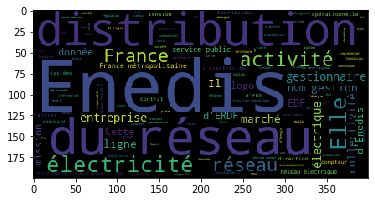

In [26]:
wd = WordCloud(stopwords=STOP_WORDS)
cloud = wd.generate(doc.text)
plt.imshow(cloud)

* Enfin nous aurions besoin d'avoir un corpus de mots lemmatisés, recréez un corpus de mots lemmatisés et visualisez votre nouveau nuage de mots

In [ ]:
lemma = [token.___ for token in doc if token.___ not in STOP_WORDS]

In [28]:
lemma = [token.lemma_ for token in doc if token.lemma_ not in STOP_WORDS]

In [29]:
corpus_lemma = " ".join(lemma)

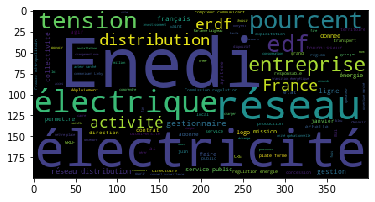

In [30]:
wd = WordCloud()
cloud = wd.generate(corpus_lemma)
plt.imshow(cloud)

# Classification de texte

In [ ]:
#!python -m spacy download en_core_web_sm
#!python -m spacy download en

In [6]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline

## Traitement

In [7]:
!python -m spacy download fr

[+] Download and installation successful
You can now load the model via spacy.load('fr_core_news_sm')
[x] Couldn't link model to 'fr'
Creating a symlink in spacy/data failed. Make sure you have the required
permissions and try re-running the command as admin, or use a virtualenv. You
can still import the model as a module and call its load() method, or create the
symlink manually.
C:\Users\Gabriel\Anaconda3\lib\site-packages\fr_core_news_sm -->
C:\Users\Gabriel\Anaconda3\lib\site-packages\spacy\data\fr
[!] Download successful but linking failed
Creating a shortcut link for 'fr' didn't work (maybe you don't have admin
permissions?), but you can still load the model via its full package name: nlp =
spacy.load('fr_core_news_sm')


Vous ne disposez pas de privilŠges suffisants pour effectuer cette op‚ration.


In [8]:
import string
from spacy.lang.fr.stop_words import STOP_WORDS
from spacy.lang.fr import French

# Création de la liste de signes de ponctuation
punctuations = string.punctuation
stop_words = spacy.lang.fr.stop_words.STOP_WORDS

# Charger English tokenizer, tagger, parser, NER and word vectors
parser = French()

# Création de la fonction de tokenization
def spacy_tokenizer(sentence):
    # Création du token, utilisé pour créer des documents avec des annotations linguistiques
    mytokens = parser(sentence)

    # Lemmatisation de chaque token et conversion en caractères minuscules
    mytokens = [word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Suppression des stop words
    mytokens = [word for word in mytokens if word not in stop_words and word not in punctuations ]

    # On retourne la liste des tokens préparés
    return mytokens

In [9]:
# Transformer personnalisé grâce à spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Nettoyage du texte
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Fonction basique pour nettoyer le texte
def clean_text(text):
    # Suppression des espaces et conversion des caractères en minuscules
    return text.strip().lower()

In [10]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

In [11]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [12]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('restaurants.csv')

X = df['texte'] # les données que l'on veut analyser
ylabels = df['label_2'] # les labels, ou réponses, pour lesquels on veut tester notre modèle

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)

In [13]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# Création du pipeline en utilisant des Bag of Words
pipe = Pipeline([('cleaner', predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier)])

# Génération du modèle
pipe.fit(X_train,y_train)

C:\Users\Gabriel\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Pipeline(memory=None,
         steps=[('cleaner', <__main__.predictors object at 0x000000C4CAB50388>),
                ('vectorizer',
                 CountVectorizer(analyzer='word', binary=False,
                                 decode_error='strict',
                                 dtype=<class 'numpy.int64'>, encoding='utf-8',
                                 input='content', lowercase=True, max_df=1.0,
                                 max_features=None, min_df=1,
                                 ngram_range=(1, 1), preprocessor=None,
                                 stop_words=None, strip_accents=None,
                                 token_pattern='(?u)\\b\\w\\w+\\b',
                                 tokenizer=<function spacy_tokenizer at 0x000000C4C810E558>,
                                 vocabulary=None)),
                ('classifier',
                 LogisticRegression(C=1.0, class_weight=None, dual=False,
                                    fit_intercept=True, intercept_

In [14]:
from sklearn import metrics
# Predicting avec un dataset de test
predicted = pipe.predict(X_test)

# Précision du modèle
print("Confusion matrix:\n",metrics.confusion_matrix(y_test, predicted))
print("\nLogistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
# print("Logistic Regression Precision and Recall:",metrics.precision_score(y_test, predicted, average = None))
# print("Logistic Regression Precision and Recall:",metrics.recall_score(y_test, predicted, average = None))

Confusion matrix:
 [[51 10]
 [10 30]]

Logistic Regression Accuracy: 0.801980198019802


In [15]:
y_test.values

array([0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1], dtype=int64)

In [16]:
predicted

array([1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1], dtype=int64)

**Remarque**

La qualité des données initiales a un rôle fondamental.

*Exemple*
- `' '.join(sentences)` --> 75% accuracy
- `'. '.join(sentences)` --> 80% accuracy

## T-SNE sur TF-IDF

In [93]:
X = df['texte'] # les données que l'on veut analyser
ylabels = df['label_3'] # les labels, ou réponses, pour lesquels on veut tester notre modèle
print(df.loc[:, ['texte','label_3']])

                                                 texte  label_3
0    Un service passable .. Des plats surcuits, des...        0
1    Nous avons bien aimé l'ambiance, sur la promen...        2
2    on s'attendait à mieux (attente, qualité moyen...        0
3    Une adresse à garder pour soi vue imprenable s...        2
4    Une petite dame nous accueille sans le sourire...        0
..                                                 ...      ...
330  des problèmes digestifs aprés le repas!. j'ai ...        0
331  Alors là, si vous voulez un resto classe, une ...        2
332  Les amis voulaient manger des crêpes mais ... ...        2
333  Dés que nous sommes rentrés dans l’établissent...        0
334  la salle de restaurant fait cantine,la déco es...        0

[335 rows x 2 columns]


In [94]:
# On calcule le tf-idf pour chaque mot de chaque texte
tfidf = tfidf_vector.fit_transform(X)
print(tfidf[0])

  (0, 2651)	0.20078885050472878
  (0, 1149)	0.22672179959055136
  (0, 2)	0.15604491513758725
  (0, 2595)	0.28733889863893625
  (0, 1499)	0.18847666822573728
  (0, 839)	0.20815658681742058
  (0, 2386)	0.12785956917735244
  (0, 2860)	0.29965108091792775
  (0, 3018)	0.21981579033514045
  (0, 942)	0.23052855450099133
  (0, 2342)	0.29965108091792775
  (0, 1345)	0.3378962122827418
  (0, 2806)	0.277279113234357
  (0, 2980)	0.3378962122827418
  (0, 2295)	0.12041525261453508
  (0, 1)	0.0662300369279417
  (0, 2189)	0.29965108091792775
  (0, 2856)	0.1058978343230056


In [95]:
# Affichage des résultats pour le prmeier commentaire

# Premier commentaire
print(df.loc[0, 'texte'])

# TF-IDF pour le premier commentaire
df_tfidf = pd.DataFrame(tfidf[0].T.todense(), index = tfidf_vector.get_feature_names(), columns=["tf_idf"])
df_tfidf.sort_values(by=["tf_idf"],ascending=False)

Un service passable .. Des plats surcuits, des sauces figées dans leur pot (on se demande si elles n'étaient pas sur d'autres tables avant de nous être servies) , le prix est correct mais le goût n'est pas au rendez vous ... très déçu par ce resto


,tf_idf
figées,0.337896
surcuits,0.337896
passable,0.299651
pot,0.299651
servies,0.299651
...,...
dérangés,0.000000
dés,0.000000
désagréable,0.000000
désagréables,0.000000


In [96]:
# Création d'un dataframe regroupant les tf-idf et les labels
df_tfidf = pd.DataFrame(tfidf.todense(), columns = tfidf_vector.get_feature_names())
df_tfidf = pd.concat([df_tfidf, ylabels], axis=1)
print(df_tfidf)

     -plat        ..       ...      ....     .....    ......  .repas    0  \
0      0.0  0.066230  0.156045  0.000000  0.000000  0.000000     0.0  0.0   
1      0.0  0.082359  0.000000  0.000000  0.000000  0.000000     0.0  0.0   
2      0.0  0.183789  0.000000  0.000000  0.000000  0.000000     0.0  0.0   
3      0.0  0.000000  0.000000  0.000000  0.000000  0.000000     0.0  0.0   
4      0.0  0.036300  0.085525  0.166729  0.122311  0.157485     0.0  0.0   
..     ...       ...       ...       ...       ...       ...     ...  ...   
330    0.0  0.000000  0.000000  0.000000  0.000000  0.000000     0.0  0.0   
331    0.0  0.055720  0.000000  0.000000  0.000000  0.000000     0.0  0.0   
332    0.0  0.043352  0.102142  0.000000  0.000000  0.000000     0.0  0.0   
333    0.0  0.033125  0.078046  0.304295  0.000000  0.000000     0.0  0.0   
334    0.0  0.000000  0.000000  0.000000  0.000000  0.000000     0.0  0.0   

     0,50   00  ...  évolution  évoqué  êtes  île  îles  œuf  œufs    …    

In [147]:
# t-SNE sur les données
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
import seaborn as sns

tsne = TSNE(n_components=2, init = 'random', verbose=1, perplexity=7, n_iter=1000)
tsne_results = tsne.fit_transform(df_tfidf.drop(['label_3'], axis=1))

[t-SNE] Computing 22 nearest neighbors...
[t-SNE] Indexed 335 samples in 0.027s...
[t-SNE] Computed neighbors for 335 samples in 0.186s...
[t-SNE] Computed conditional probabilities for sample 335 / 335
[t-SNE] Mean sigma: 1.887155
[t-SNE] KL divergence after 250 iterations with early exaggeration: 50.997681
[t-SNE] KL divergence after 1000 iterations: 0.081305


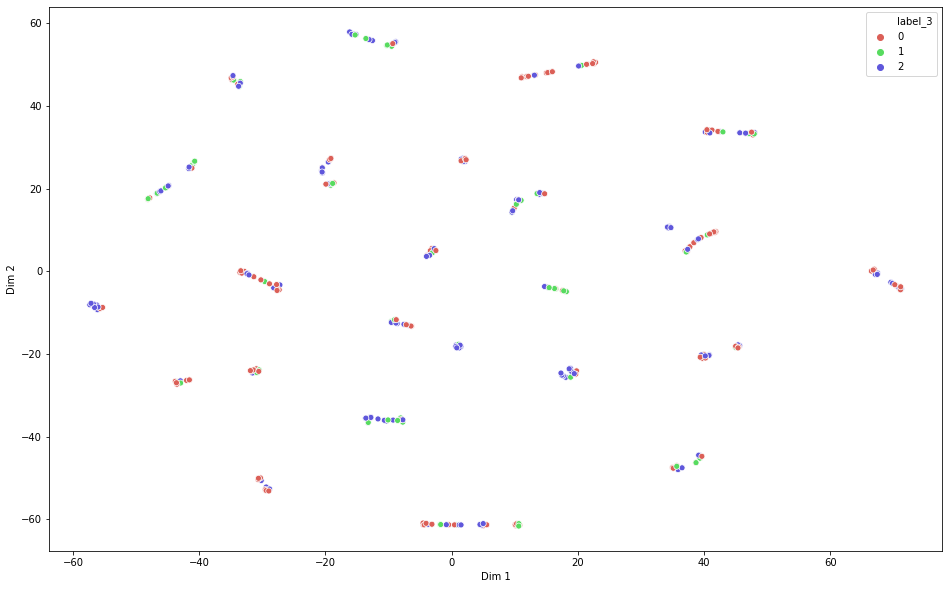

In [148]:
# On considère les deux dimensions les plus importantes
df_tfidf['Dim 1'] = tsne_results[:,0]
df_tfidf['Dim 2'] = tsne_results[:,1]

# On projette les données sur les deux axes, en colorant les points avec les labels
plt.figure(figsize=(16,10))
sns.scatterplot(
    x = "Dim 1", y = "Dim 2",
    hue = "label_3",
    palette = sns.color_palette("hls", 3),
    data = df_tfidf,
    legend = "full",
    alpha = 1.0
)

In [ ]:
# python -m spacy download fr
# python -m spacy download fr_core_news_md

import spacy
from spacy import displacy

In [ ]:
# analyse factorielle (ACP, projection de texte)

# Tokenization, Stemming, Lemmatization, POS-tagging, Vectorization

In [ ]:
# TF-IDF
# Stop words
# Lemmatisation : regroupement des mots d une même famille dans un texte, afin de réduire ces mots à leur forme canonique (le lemme), comme petit, petite, petits, et petites.
# Racinisation (stemming) : regroupement des mots ayant une racine commune et appartenant au même champ lexical.
# Reconnaissance d entités nommées : détermination dans un texte des noms propres, tels que des personnes ou des endroits, ainsi que les quantités, valeurs, ou dates.


# Ressources

Quentin 
https://www.dataquest.io/blog/tutorial-text-classification-in-python-using-spacy/

Gabriel
https://medium.com/@MSalnikov/text-clustering-with-k-means-and-tf-idf-f099bcf95183

Complément
https://www.actuia.com/contribution/victorbigand/tutoriel-tal-pour-les-debutants-classification-de-texte/

## Moins intéressantes

Tuto cloudwords

https://www.datacamp.com/community/tutorials/wordcloud-python

https://www.analyticsvidhya.com/blog/2018/02/the-different-methods-deal-text-data-predictive-python/

1. Basic feature extraction using text data
    - Number of words
    - Number of characters
    - Average word length
    - Number of stopwords
    - Number of special characters
    - Number of numerics
    - Number of uppercase words
2. Basic Text Pre-processing of text data
    - Lower casing
    - Punctuation removal
    - Stopwords removal
    - Frequent words removal
    - Rare words removal
    - Spelling correction
    - Tokenization
    - Stemming
    - Lemmatization
3. Advance Text Processing
    - N-grams
    - Term Frequency
    - Inverse Document Frequency
    - Term Frequency-Inverse Document Frequency (TF-IDF)
    - Bag of Words
    - Sentiment Analysis
    - Word Embedding

https://www.actuia.com/contribution/victorbigand/tutoriel-tal-pour-les-debutants-classification-de-texte/

Classification de texte (spams sur commentaires youtube)

https://towardsdatascience.com/data-scientists-guide-to-summarization-fc0db952e363

**NLTK Summarizer**

We wanted to start our text summarization journey by trying something simple. So we turned to the popular NLP package in python — NLTK. The idea here was to summarize by identifying “top” sentences based on word frequency.

1. tokenize words
    - Pre-process the text by removing numbers, white spaces and ponctuation
    - Remove stopwords
    - Tokenize all words in the document
2. Word frequency
    - Calculate the frequency for every token in the document
3. Sentence selection
    - Sentence score is calculated for every sentence
    - It is the sum of the word frequency of every word in the sentence
    - Top 'n' sentences are selected based on highest sentence scores

In [ ]:
nlp = spacy.load('fr_core_news_md') # en_core_web_sm

from spacy.lang.fr.stop_words import STOP_WORDS
STOP_WORDS.add("blabla")
stopwords = STOP_WORDS
print(list(stopwords)[:10])

In [ ]:
# text = "Ceci est un exemple de texte destiné à tester les différentes librairies Python et à préparer une démonstration. Ce texte a été préparé par Gabriel pour LinkyStat."
# text = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'
# text = "The engine coughs and shakes its head. The smoke, a plume of red and white, Waves madly in the face of night. And now the grave incurious stars Gleam on the groaning hurrying cars. Against the kind and awful reign Of darkness, this our angry train, A noisy little rebel, pouts Its brief defiance, flames and shouts— And passes on, and leaves no trace. For darkness holds its ancient place, Serene and absolute, the king Unchanged, of every living thing. The houses lie obscure and still In Rutherford and Carlton Hill. Our lamps intensify the dark Of slumbering Passaic Park. And quiet holds the weary feet That daily tramp through Prospect Street. What though we clang and clank and roar Through all Passaic's streets? No door Will open, not an eye will see Who this loud vagabond may be. Upon my crimson cushioned seat, In manufactured light and heat, I feel unnatural and mean. Outside the towns are cool and clean; Curtained awhile from sound and sight They take God's gracious gift of night. The stars are watchful over them. On Clifton as on Bethlehem The angels, leaning down the sky, Shed peace and gentle dreams. And I— I ride, I blasphemously ride Through all the silent countryside. The engine's shriek, the headlight s glare, Pollute the still nocturnal air. The cottages of Lake View sigh And sleeping, frown as we pass by. Why, even strident Paterson Rests quietly as any nun. Her foolish warring children keep The grateful armistice of sleep. For what tremendous errand's sake Are we so blatantly awake? What precious secret is our freight? What king must be abroad so late? Perhaps Death roams the hills to-night And we rush forth to give him fight. Or else, perhaps, we speed his way To some remote unthinking prey. Perhaps a woman writhes in pain And listens—listens for the train! The train, that like an angel sings, The train, with healing on its wings. Now \"Hawthorne!\" the conductor cries. My neighbor starts and rubs his eyes. He hurries yawning through the car And steps out where the houses are. This is the reason of our quest! Not wantonly we break the rest Of town and village, nor do we Lightly profane night's sanctity. What Love commands the train fulfills, And beautiful upon the hills Are these our feet of burnished steel. Subtly and certainly I feel That Glen Rock welcomes us to her And silent Ridgewood seems to stir And smile, because she knows the train Has brought her children back again. We carry people home—and so God speeds us, wheresoe'er we go. Hohokus, Waldwick, Allendale Lift sleepy heads to give us hail. In Ramsey, Mahwah, Suffern stand Houses that wistfully demand A father—son—some human thing That this, the midnight train, may bring. The trains that travel in the day They hurry folks to work or play. The midnight train is slow and old But of it let this thing be told, To its high honor be it said It carries people home to bed. My cottage lamp shines white and clear. God bless the train that brought me here."
text = "Ce jour-là, 25 mars dernier, Pétersbourg fut le théâtre d’une aventure des plus étranges. Le barbier Ivan Yakovlévitch, domicilié avenue de l’Ascension (son nom de famille est perdu et son enseigne ne porte que l’inscription : On pratique aussi les saignées, au-dessous d’un monsieur à la joue barbouillée de savon), le barbier Ivan Yakovlévitch se réveilla d’assez bonne heure et perçut une odeur de pain chaud. S’étant mis sur son séant, il vit que son épouse – personne plutôt respectable et qui prisait fort le café – défournait des pains tout frais cuits. « Aujourd’hui, Prascovie Ossipovna, je ne prendrai pas de café, déclara Ivan Yakovlévitch ; je préfère grignoter un bon pain chaud avec de la ciboule. » À la vérité, Ivan Yakovlévitch aurait bien voulu et pain et café, mais il jugeait impossible de demander les deux choses à la fois, Prascovie Ossipovna ne tolérant pas de semblables caprices. « Tant mieux, se dit la respectable épouse en jetant un pain sur la table. Que mon nigaud s’empiffre de pain ! Il me restera davantage de café. » Respectueux des convenances, Ivan Yakovlévitch passa son habit par-dessus sa chemise et se mit en devoir de déjeuner. Il posa devant lui une pincée de sel, nettoya deux oignons, prit son couteau et, la mine grave, coupa son pain en deux. Il aperçut alors, à sa grande surprise, un objet blanchâtre au beau milieu ; il le tâta précautionneusement du couteau, le palpa du doigt… « Qu’est-ce que cela peut bien être ? » se dit-il en éprouvant de la résistance. Il fourra alors ses doigts dans le pain et en retira… un nez ! Les bras lui en tombèrent."


In [ ]:
print(text)

In [ ]:
# Tokenization
doc = nlp(text)
tokens = [token for token in doc if not token.text in stopwords]

In [ ]:
print(tokens)

In [ ]:
# Lemmatization
for token in tokens:
    print('Original : %s, New: %s' % (token.text, token.lemma_))

In [ ]:
# POS tags

# NP: noun phrase
# DT: determiner
# JJ: adjective
# JJS: adjective, superlative
# NN: noun
# NNP: proper noun, singular
# NNS: noun, plural
# IN: preposition or subordinating conjunction
# VBD: verb, past tense
# VBZ: verb, 3rd person singular present

for token in tokens:
    print('Word: %s, POS: %s' % (token.text, token.tag_))

In [ ]:
# Lemmatization and POS tags
[(token.orth_,token.pos_, token.lemma_) for token in
 [y for y in doc if not y.is_stop and y.pos_ != 'PUNCT']]

In [ ]:
# Stemming
import nltk
from nltk.stem.porter import *
stemmer = PorterStemmer()
for token in tokens:
    print('Original : %s, Root form: %s' % (token.text, stemmer.stem(token.text)))

In [ ]:
# Name-Entity Recognition (NER)

for entity in doc.ents:
    print(entity.text + ' - ' + entity.label_ + ' - ' + str(spacy.explain(entity.label_)))

In [ ]:
# Detecting nouns

for noun in doc.noun_chunks:
    print(noun.text)

In [ ]:
# Begin: first token of a multi-token entity
# In: inner token of a multi-token entity
# Last: last token of a multi-token entity
# Unit: single-token entity
# Out: non-entity token

print([(token, token.ent_iob_, token.ent_type_) for token in doc])

In [ ]:
displacy.render(nlp(str(text)), jupyter=True, style='ent')

In [ ]:
displacy.render(nlp(str(text)), style='dep', jupyter = True, options = {'distance': 120})

### Bonus de spacy

#### Similarité

- `spaCy` can compare two objects and predict similarity
- `Doc.similarity()`, `Span.similarity()` and `Token.similarity()`
- Take another object and return a similarity score (`0` to `1`)
- Important: needs a model that has word vectors included, for example:
    - ✅ `en_core_web_md` (medium model)
    - ✅ `en_core_web_lg` (large model)
    - 🚫 NOT `en_core_web_sm` (small model)

In [ ]:
# Load a larger model with vectors
nlp = spacy.load("en_core_web_md")

# Compare two documents
doc1 = nlp("I like fast food")
doc2 = nlp("I like pizza")
print(doc1.similarity(doc2))

In [ ]:
# Compare two tokens
doc = nlp("I like pizza and pasta")
token1 = doc[2]
token2 = doc[4]
print(token1.similarity(token2))

#### Matcher

- Lists of dictionaries, one per token
- Match exact token texts `[{"TEXT": "iPhone"}, {"TEXT": "X"}]`
- Match lexical attributes `[{"LOWER": "iphone"}, {"LOWER": "x"}]`
- Match any token attributes `[{"LEMMA": "buy"}, {"POS": "NOUN"}]`

In [ ]:
import spacy

# Import the Matcher
from spacy.matcher import Matcher

# Load a model and create the nlp object
nlp = spacy.load("fr_core_news_md")

# Initialize the matcher with the shared vocab
matcher = Matcher(nlp.vocab)

# Add the pattern to the matcher
pattern = [{"TEXT": "iPhone"}, {"TEXT": "X"}]
matcher.add("IPHONE_PATTERN", None, pattern)

# Process some text
doc = nlp("Upcoming iPhone X release date leaked")

# Call the matcher on the doc
matches = matcher(doc)

In [ ]:
pattern = [
    {"IS_DIGIT": True},
    {"LOWER": "fifa"},
    {"LOWER": "world"},
    {"LOWER": "cup"},
    {"IS_PUNCT": True}
]
doc = nlp("2018 FIFA World Cup: France won!")

**Pour aller plus loin avec spacy**

N'hésitez pas à consulter ce tuto qui est très bien fait -> https://course.spacy.io/en/chapter1

# Brouillon

## Gabriel

In [ ]:
# text = "Ceci est un exemple de texte destiné à tester les différentes librairies Python et à préparer une démonstration. Ce texte a été préparé par Gabriel pour LinkyStat."
# text = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'
# text = "The engine coughs and shakes its head. The smoke, a plume of red and white, Waves madly in the face of night. And now the grave incurious stars Gleam on the groaning hurrying cars. Against the kind and awful reign Of darkness, this our angry train, A noisy little rebel, pouts Its brief defiance, flames and shouts— And passes on, and leaves no trace. For darkness holds its ancient place, Serene and absolute, the king Unchanged, of every living thing. The houses lie obscure and still In Rutherford and Carlton Hill. Our lamps intensify the dark Of slumbering Passaic Park. And quiet holds the weary feet That daily tramp through Prospect Street. What though we clang and clank and roar Through all Passaic's streets? No door Will open, not an eye will see Who this loud vagabond may be. Upon my crimson cushioned seat, In manufactured light and heat, I feel unnatural and mean. Outside the towns are cool and clean; Curtained awhile from sound and sight They take God's gracious gift of night. The stars are watchful over them. On Clifton as on Bethlehem The angels, leaning down the sky, Shed peace and gentle dreams. And I— I ride, I blasphemously ride Through all the silent countryside. The engine's shriek, the headlight s glare, Pollute the still nocturnal air. The cottages of Lake View sigh And sleeping, frown as we pass by. Why, even strident Paterson Rests quietly as any nun. Her foolish warring children keep The grateful armistice of sleep. For what tremendous errand's sake Are we so blatantly awake? What precious secret is our freight? What king must be abroad so late? Perhaps Death roams the hills to-night And we rush forth to give him fight. Or else, perhaps, we speed his way To some remote unthinking prey. Perhaps a woman writhes in pain And listens—listens for the train! The train, that like an angel sings, The train, with healing on its wings. Now \"Hawthorne!\" the conductor cries. My neighbor starts and rubs his eyes. He hurries yawning through the car And steps out where the houses are. This is the reason of our quest! Not wantonly we break the rest Of town and village, nor do we Lightly profane night's sanctity. What Love commands the train fulfills, And beautiful upon the hills Are these our feet of burnished steel. Subtly and certainly I feel That Glen Rock welcomes us to her And silent Ridgewood seems to stir And smile, because she knows the train Has brought her children back again. We carry people home—and so God speeds us, wheresoe'er we go. Hohokus, Waldwick, Allendale Lift sleepy heads to give us hail. In Ramsey, Mahwah, Suffern stand Houses that wistfully demand A father—son—some human thing That this, the midnight train, may bring. The trains that travel in the day They hurry folks to work or play. The midnight train is slow and old But of it let this thing be told, To its high honor be it said It carries people home to bed. My cottage lamp shines white and clear. God bless the train that brought me here."

text = "Ce jour-là, 25 mars dernier, Pétersbourg fut le théâtre d’une aventure"
"des plus étranges. Le barbier Ivan Yakovlévitch, domicilié avenue de"
"l’Ascension (son nom de famille est perdu et son enseigne ne porte que"
"l’inscription : On pratique aussi les saignées, au-dessous d’un monsieur"
"à la joue barbouillée de savon), le barbier Ivan Yakovlévitch se réveilla"
"d’assez bonne heure et perçut une odeur de pain chaud. S’étant mis sur"
"son séant, il vit que son épouse – personne plutôt respectable et qui"
"prisait fort le café – défournait des pains tout frais cuits."
" « Aujourd’hui, Prascovie Ossipovna, je ne prendrai pas de café, déclara"
"Ivan Yakovlévitch ; je préfère grignoter un bon pain chaud avec de la"
"ciboule. » À la vérité, Ivan Yakovlévitch aurait bien voulu et pain et"
"café, mais il jugeait impossible de demander les deux choses à la fois,"
""" Prascovie Ossipovna ne tolérant pas de semblables caprices. « Tant"
"mieux, se dit la respectable épouse en jetant un pain sur la table. Que"
"mon nigaud s’empiffre de pain ! Il me restera davantage de café. »"
" Respectueux des convenances, Ivan Yakovlévitch passa son habit"
"par-dessus sa chemise et se mit en devoir de déjeuner. Il posa devant"
"lui une pincée de sel, nettoya deux oignons, prit son couteau et, la"
"mine grave, coupa son pain en deux. Il aperçut alors, à sa grande"
"surprise, un objet blanchâtre au beau milieu ; il le tâta"
"précautionneusement du couteau, le palpa du doigt… « Qu’est-ce que cela"
"peut bien être ? » se dit-il en éprouvant de la résistance. Il fourra"
"alors ses doigts dans le pain et en retira… un nez ! Les bras lui en"
"tombèrent."

In [ ]:
nlp = spacy.load('fr_core_news_md') # en_core_web_sm

from spacy.lang.fr.stop_words import STOP_WORDS
STOP_WORDS.add("blabla")
stopwords = STOP_WORDS
print(list(stopwords)[:10])

In [ ]:
print(text)

In [ ]:
# text = "Ceci est un exemple de texte destiné à tester les différentes librairies Python et à préparer une démonstration. Ce texte a été préparé par Gabriel pour LinkyStat."
# text = 'European authorities fined Google a record $5.1 billion on Wednesday for abusing its power in the mobile phone market and ordered the company to alter its practices'
# text = "The engine coughs and shakes its head. The smoke, a plume of red and white, Waves madly in the face of night. And now the grave incurious stars Gleam on the groaning hurrying cars. Against the kind and awful reign Of darkness, this our angry train, A noisy little rebel, pouts Its brief defiance, flames and shouts— And passes on, and leaves no trace. For darkness holds its ancient place, Serene and absolute, the king Unchanged, of every living thing. The houses lie obscure and still In Rutherford and Carlton Hill. Our lamps intensify the dark Of slumbering Passaic Park. And quiet holds the weary feet That daily tramp through Prospect Street. What though we clang and clank and roar Through all Passaic's streets? No door Will open, not an eye will see Who this loud vagabond may be. Upon my crimson cushioned seat, In manufactured light and heat, I feel unnatural and mean. Outside the towns are cool and clean; Curtained awhile from sound and sight They take God's gracious gift of night. The stars are watchful over them. On Clifton as on Bethlehem The angels, leaning down the sky, Shed peace and gentle dreams. And I— I ride, I blasphemously ride Through all the silent countryside. The engine's shriek, the headlight s glare, Pollute the still nocturnal air. The cottages of Lake View sigh And sleeping, frown as we pass by. Why, even strident Paterson Rests quietly as any nun. Her foolish warring children keep The grateful armistice of sleep. For what tremendous errand's sake Are we so blatantly awake? What precious secret is our freight? What king must be abroad so late? Perhaps Death roams the hills to-night And we rush forth to give him fight. Or else, perhaps, we speed his way To some remote unthinking prey. Perhaps a woman writhes in pain And listens—listens for the train! The train, that like an angel sings, The train, with healing on its wings. Now \"Hawthorne!\" the conductor cries. My neighbor starts and rubs his eyes. He hurries yawning through the car And steps out where the houses are. This is the reason of our quest! Not wantonly we break the rest Of town and village, nor do we Lightly profane night's sanctity. What Love commands the train fulfills, And beautiful upon the hills Are these our feet of burnished steel. Subtly and certainly I feel That Glen Rock welcomes us to her And silent Ridgewood seems to stir And smile, because she knows the train Has brought her children back again. We carry people home—and so God speeds us, wheresoe'er we go. Hohokus, Waldwick, Allendale Lift sleepy heads to give us hail. In Ramsey, Mahwah, Suffern stand Houses that wistfully demand A father—son—some human thing That this, the midnight train, may bring. The trains that travel in the day They hurry folks to work or play. The midnight train is slow and old But of it let this thing be told, To its high honor be it said It carries people home to bed. My cottage lamp shines white and clear. God bless the train that brought me here."
text = "Ce jour-là, 25 mars dernier, Pétersbourg fut le théâtre d’une aventure des plus étranges. Le barbier Ivan Yakovlévitch, domicilié avenue de l’Ascension (son nom de famille est perdu et son enseigne ne porte que l’inscription : On pratique aussi les saignées, au-dessous d’un monsieur à la joue barbouillée de savon), le barbier Ivan Yakovlévitch se réveilla d’assez bonne heure et perçut une odeur de pain chaud. S’étant mis sur son séant, il vit que son épouse – personne plutôt respectable et qui prisait fort le café – défournait des pains tout frais cuits. « Aujourd’hui, Prascovie Ossipovna, je ne prendrai pas de café, déclara Ivan Yakovlévitch ; je préfère grignoter un bon pain chaud avec de la ciboule. » À la vérité, Ivan Yakovlévitch aurait bien voulu et pain et café, mais il jugeait impossible de demander les deux choses à la fois, Prascovie Ossipovna ne tolérant pas de semblables caprices. « Tant mieux, se dit la respectable épouse en jetant un pain sur la table. Que mon nigaud s’empiffre de pain ! Il me restera davantage de café. » Respectueux des convenances, Ivan Yakovlévitch passa son habit par-dessus sa chemise et se mit en devoir de déjeuner. Il posa devant lui une pincée de sel, nettoya deux oignons, prit son couteau et, la mine grave, coupa son pain en deux. Il aperçut alors, à sa grande surprise, un objet blanchâtre au beau milieu ; il le tâta précautionneusement du couteau, le palpa du doigt… « Qu’est-ce que cela peut bien être ? » se dit-il en éprouvant de la résistance. Il fourra alors ses doigts dans le pain et en retira… un nez ! Les bras lui en tombèrent."


In [ ]:
# Tokenization
doc = nlp(text)
tokens = [token for token in doc if not token.text in stopwords]

In [ ]:
print(tokens)

In [ ]:
# Lemmatization
for token in tokens:
    print('Original : %s, New: %s' % (token.text, token.lemma_))

In [ ]:
# POS tags

# NP: noun phrase
# DT: determiner
# JJ: adjective
# JJS: adjective, superlative
# NN: noun
# NNP: proper noun, singular
# NNS: noun, plural
# IN: preposition or subordinating conjunction
# VBD: verb, past tense
# VBZ: verb, 3rd person singular present

for token in tokens:
    print('Word: %s, POS: %s' % (token.text, token.tag_))

In [ ]:
# Lemmatization and POS tags
[(token.orth_,token.pos_, token.lemma_) for token in
 [y for y in doc if not y.is_stop and y.pos_ != 'PUNCT']]

In [ ]:
# Stemming
import nltk
from nltk.stem.porter import *
stemmer = PorterStemmer()
for token in tokens:
    print('Original : %s, Root form: %s' % (token.text, stemmer.stem(token.text)))

In [ ]:
# Name-Entity Recognition (NER)

for entity in doc.ents:
    print(entity.text + ' - ' + entity.label_ + ' - ' + str(spacy.explain(entity.label_)))

In [ ]:
# Detecting nouns

for noun in doc.noun_chunks:
    print(noun.text)

In [ ]:
# Begin: first token of a multi-token entity
# In: inner token of a multi-token entity
# Last: last token of a multi-token entity
# Unit: single-token entity
# Out: non-entity token

print([(token, token.ent_iob_, token.ent_type_) for token in doc])

In [ ]:
displacy.render(nlp(str(text)), jupyter=True, style='ent')

In [ ]:
displacy.render(nlp(str(text)), style='dep', jupyter = True, options = {'distance': 120})

## Classif en anglais

In [ ]:
ls datasets

In [ ]:
df_amazon = pd.read_csv ("datasets/amazon_alexa.tsv", sep="\t")

In [ ]:
df_amazon.feedback.value_counts()

In [ ]:
df_amazon

In [ ]:
import string
from spacy.lang.en.stop_words import STOP_WORDS
from spacy.lang.en import English

# Create our list of punctuation marks
punctuations = string.punctuation

# Create our list of stopwords
nlp = spacy.load('en')
stop_words = spacy.lang.en.stop_words.STOP_WORDS

# Load English tokenizer, tagger, parser, NER and word vectors
parser = English()

# Creating our tokenizer function
def spacy_tokenizer(sentence):
    # Creating our token object, which is used to create documents with linguistic annotations.
    mytokens = parser(sentence)

    # Lemmatizing each token and converting each token into lowercase
    mytokens = [ word.lemma_.lower().strip() if word.lemma_ != "-PRON-" else word.lower_ for word in mytokens ]

    # Removing stop words
    mytokens = [ word for word in mytokens if word not in stop_words and word not in punctuations ]

    # return preprocessed list of tokens
    return mytokens

In [ ]:
# Custom transformer using spaCy
class predictors(TransformerMixin):
    def transform(self, X, **transform_params):
        # Cleaning Text
        return [clean_text(text) for text in X]

    def fit(self, X, y=None, **fit_params):
        return self

    def get_params(self, deep=True):
        return {}

# Basic function to clean the text
def clean_text(text):
    # Removing spaces and converting text into lowercase
    return text.strip().lower()

In [ ]:
bow_vector = CountVectorizer(tokenizer = spacy_tokenizer, ngram_range=(1,1))

In [ ]:
tfidf_vector = TfidfVectorizer(tokenizer = spacy_tokenizer)

In [ ]:
from sklearn.model_selection import train_test_split

X = df_amazon['verified_reviews'] # the features we want to analyze
ylabels = df_amazon['feedback'] # the labels, or answers, we want to test against

X_train, X_test, y_train, y_test = train_test_split(X, ylabels, test_size=0.3)

In [ ]:
# Logistic Regression Classifier
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()

# Create pipeline using Bag of Words
pipe = Pipeline([("cleaner", predictors()),
                 ('vectorizer', bow_vector),
                 ('classifier', classifier)])

# model generation
pipe.fit(X_train,y_train)

In [ ]:
from sklearn import metrics
# Predicting with a test dataset
predicted = pipe.predict(X_test)

# Model Accuracy
print("Logistic Regression Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Logistic Regression Precision:",metrics.precision_score(y_test, predicted))
print("Logistic Regression Recall:",metrics.recall_score(y_test, predicted))